In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1800x720 with 0 Axes>

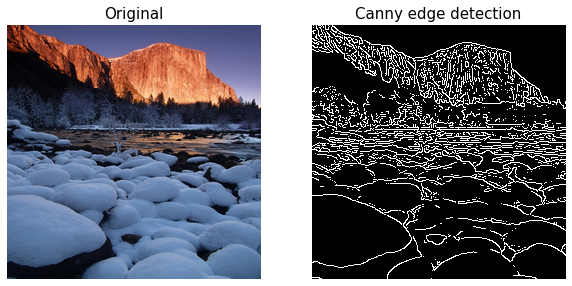

In [2]:
img = cv2.imread("Images/2007-01-15 20_05_43.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edge = cv2.Canny(img, 127, 127)

plt.figure(figsize = (25, 10))

images = [img, edge]
titles = ["Original", "Canny edge detection"]

fig = plt.figure(figsize = (10, 10))
for i in range(2):
    ax = fig.add_subplot(1, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict = {'fontsize':15})
    ax.axis('off')
    
plt.show()

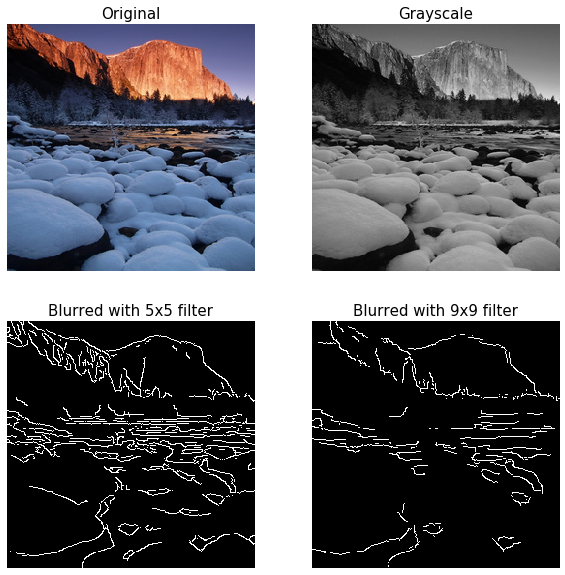

In [3]:
img = cv2.imread("Images/2007-01-15 20_05_43.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
med_val = np.median(img)

upper, lower = int(min(255, 1.3*med_val)), int(max(0, 0.7*med_val))

blur_5x5 = cv2.blur(img, ksize = (5, 5))
blur_9x9 = cv2.blur(img, ksize = (9, 9))

img_5x5 = cv2.Canny(blur_5x5, lower, upper)
img_9x9 = cv2.Canny(blur_9x9, lower, upper)

images = [img, gray, img_5x5, img_9x9]
titles = ["Original", "Grayscale", "Blurred with 5x5 filter", "Blurred with 9x9 filter"]

fig = plt.figure(figsize = (10, 10))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict = {'fontsize':15})
    ax.axis('off')
    
plt.show()

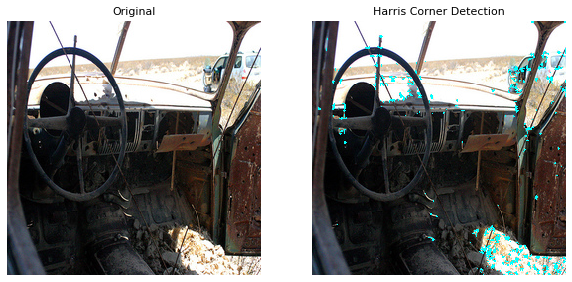

In [4]:
img = cv2.imread("Images/2011-01-05 07_51_54.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dst = cv2.cornerHarris(gray, blockSize = 2, ksize = 3, k = 0.04)

img_corner = img.copy()
img_corner[dst > 0.01*dst.max()] = (0, 255, 255)

images = [img, img_corner]
titles = ["Original", "Harris Corner Detection"]

fig = plt.figure(figsize = (10, 10))
for i in range(2):
    ax = fig.add_subplot(1, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i], fontdict = {'fontsize':11})
    ax.axis('off')
    
plt.show()

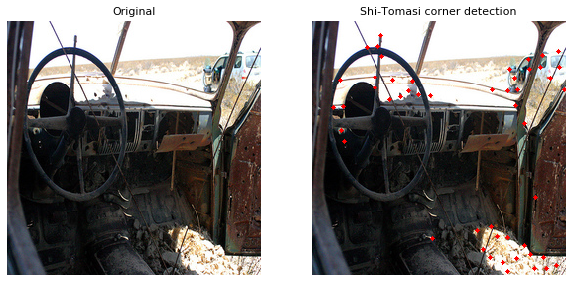

In [5]:
img = cv2.imread("Images/2011-01-05 07_51_54.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



corners = cv2.goodFeaturesToTrack(gray, maxCorners = 50, 
                                  qualityLevel = 0.01, 
                                  minDistance = 10)
corners = np.int0(corners)

img_corners = img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_corners, center = (x,y), radius = 2, color = 255, thickness = -1)
    
images = [img, img_corners]
titles = ["Original", "Shi-Tomasi corner detection"]

fig = plt.figure(figsize = (10, 10))
for i in range(2):
    ax = fig.add_subplot(1, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i], fontdict = {'fontsize':11})
    ax.axis('off')
    
plt.show()

In [6]:
face_cascade = cv2.CascadeClassifier('C:/Users/sachd/Anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')

def detect_face(img):
    
    img_copy = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    face_rects = face_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 3)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), max((w*h//50000), 5))
        
    return img_copy

(-0.5, 5085.5, 3390.5, -0.5)

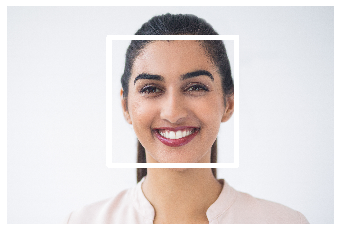

In [7]:
img = cv2.imread("Images/face1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detected = detect_face(img)
plt.imshow(detected)
plt.axis('off')

(-0.5, 1799.5, 1525.5, -0.5)

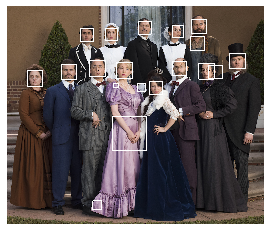

In [8]:
img = cv2.imread("Images/multi_faces.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detected = detect_face(img)
plt.imshow(detected)
plt.axis('off')

In [9]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
    
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()